In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(
    'E:\\Dataset\\btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [3]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

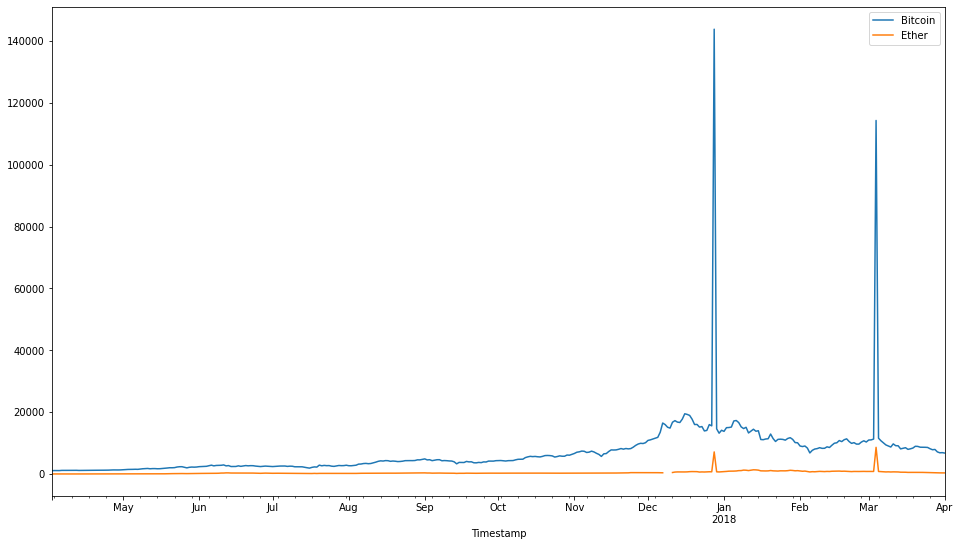

In [4]:
# bit-eth-prices-outliers
df.plot(figsize = (16, 9))

<AxesSubplot:xlabel='Timestamp'>

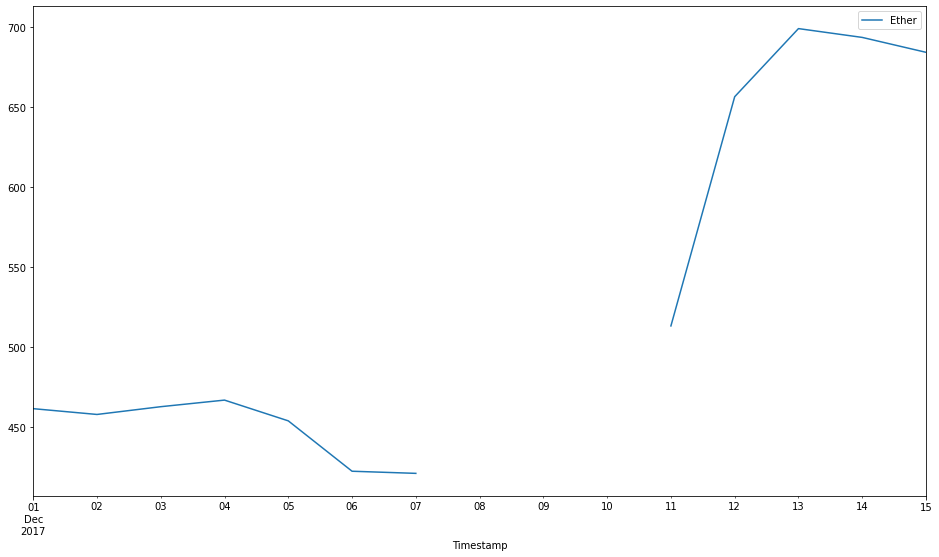

In [5]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [6]:
df_na = df.loc['2017-12': '2017-12-15']

In [7]:
# chech if there are null values 
df_na['Ether'].isna().values.any()

True

In [8]:
# finding the period of missing data
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [9]:
df.loc['2017-12-06' : '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [10]:
df.loc['2017-12-06' : '2017-12-12'].fillna(method = 'bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [11]:
df.fillna(method = 'bfill', inplace =True)

<AxesSubplot:xlabel='Timestamp'>

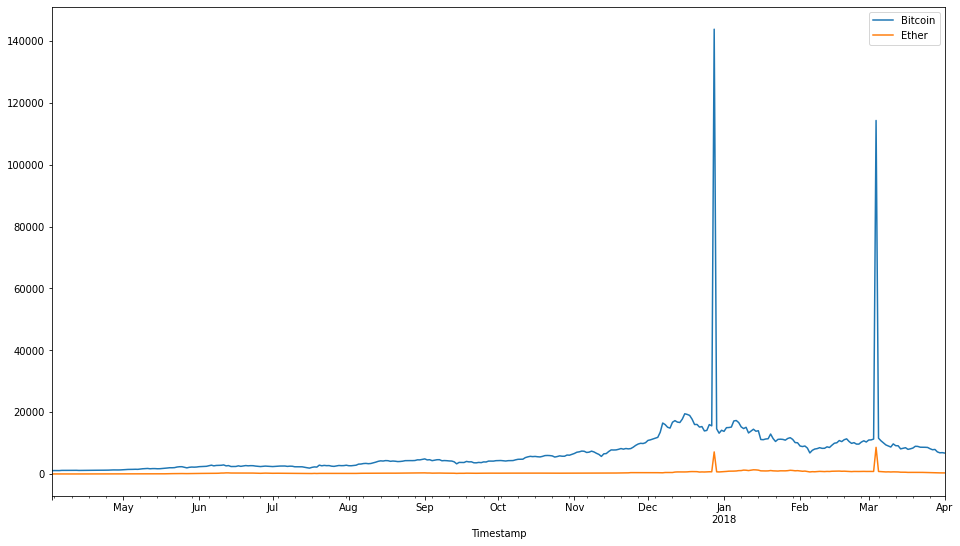

In [17]:
# let's take a look now 
df.plot(figsize = (16, 9))

<AxesSubplot:xlabel='Timestamp'>

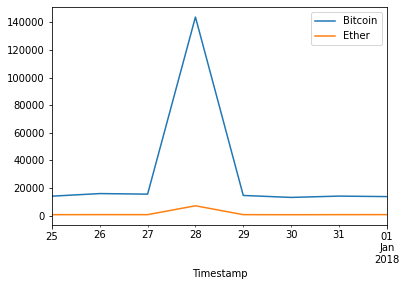

In [13]:
# fixing the huge spikes
df['2017-12-25' : '2018-01-01'].plot()

<AxesSubplot:xlabel='Timestamp'>

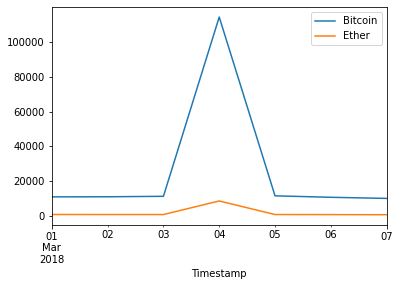

In [14]:
df['2018-03-01' : '2018-03-07'].plot()

In [15]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

<AxesSubplot:xlabel='Timestamp'>

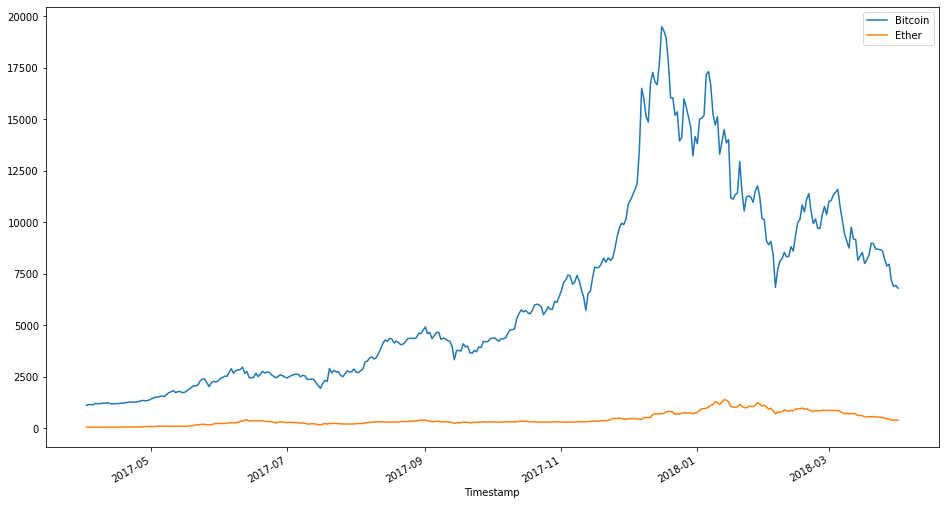

In [16]:
df_cleaned.plot(figsize= (16, 9))

In [18]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [19]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

## Visualizing distribution


<AxesSubplot:ylabel='Frequency'>

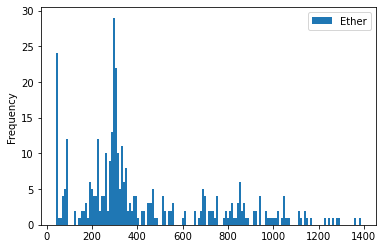

In [20]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

<AxesSubplot:ylabel='Frequency'>

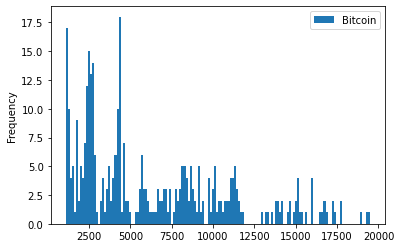

In [21]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

C:\Users\anshu\AppData\Local\Temp\ipykernel_9220\3986281779.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax = ax)


<AxesSubplot:xlabel='Ether', ylabel='Density'>

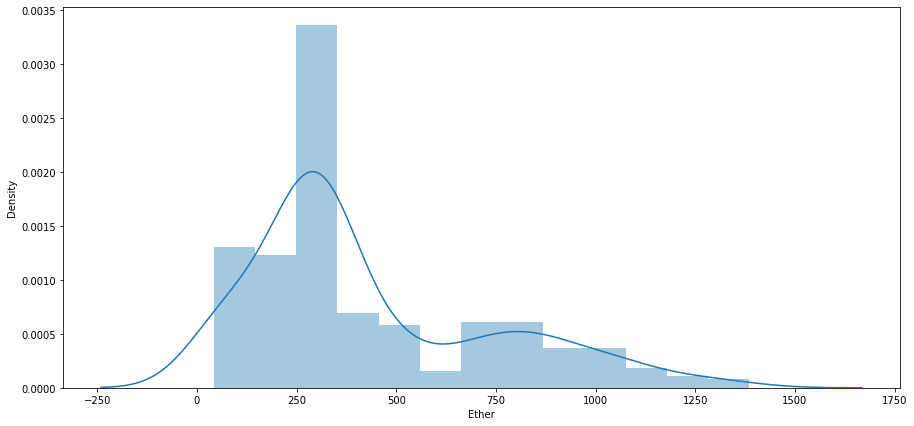

In [22]:
#using seaborn
fig, ax = plt.subplots(figsize = (15, 7))
sns.distplot(df_cleaned['Ether'], ax = ax)

C:\Users\anshu\AppData\Local\Temp\ipykernel_9220\2921601385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax)


<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

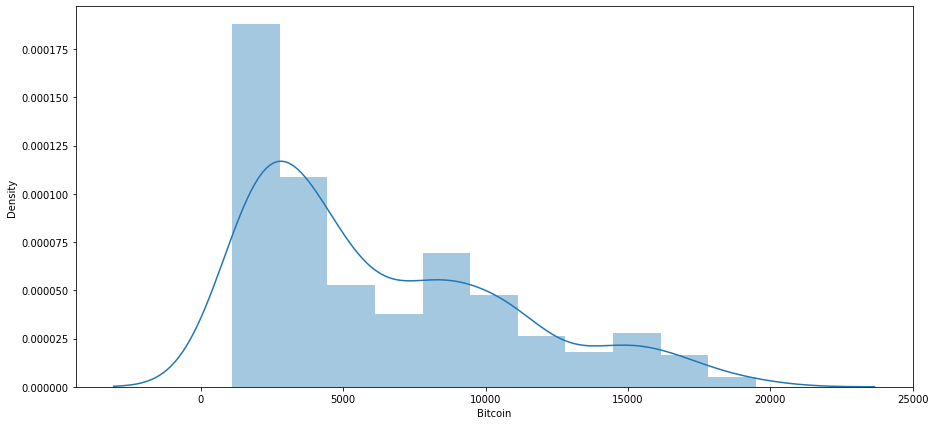

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax = ax,
            hist_kws= dict(cumulative = True),
            kde_kws= dict(cumulative = True))

In [ ]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax = ax, bins = 50,
            hist_kws= dict(cumulative = True),
            kde_kws= dict(cumulative = True))

## Visualizing bivariate distributions

In [ ]:
sns.jointplot(x='Bitcoin', y='Ether', data= df_cleaned, size = 9)

If you want only a scatter plot, you can use the regplot method, that also fits a linear regression model in the plot:

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x = 'Bitcoin', y ='Ether', data= df_cleaned, ax = ax)

## Quantiles, quartiles and percentiles

In [ ]:
df_cleaned['Bitcoin'].quantile(0.5)

In [ ]:
df_cleaned['Bitcoin'].median()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

# Dispersion

In [ ]:
# few methods to measure depresion are:
# 1. Range - it is just a maximum - minimum value
df['Bitcoin'].max() - df['Bitcoin'].min()

In [ ]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

In [ ]:
# 2. Variance Standard Deviation
df['Bitcoin'].var()

In [ ]:
# 3. Standard Deviation
df['Bitcoin'].std()

## IQR

The Interquartile range is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [ ]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

## Analytical Analysis of invalid values

In [ ]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

## Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [ ]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

In [ ]:
df[df['Bitcoin'] < upper_limit].plot(figsize = (16, 7))

In [ ]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize = (16, 7))